> ### A researcher is	interested in how variables, such as GRE (Graduate	Record	Exam scores), GPA	(grade	point	average) and prestge of	the	undergraduate institution, effect admission	into graduate school. The	response variable,admit/don’t admit, is a binary variable	

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
admission_data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [3]:
admission_data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
admission_data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


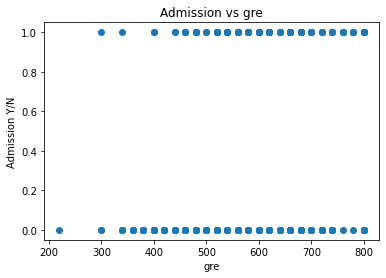

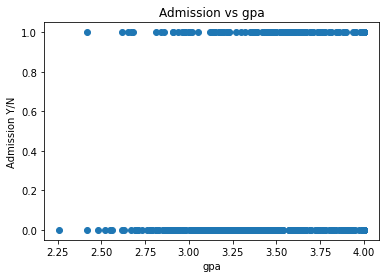

In [5]:
# admission vs gre/gpa
for i , columns in enumerate(['gre', 'gpa']):
    plt.scatter(x = admission_data[columns],y = admission_data.admit)
    plt.title('Admission vs '+columns)
    plt.xlabel(columns)
    plt.ylabel('Admission Y/N')
    plt.show()

### Get Data
> Divide the data into dependendent and independent variables

In [11]:
x = admission_data.drop('admit',axis=1)
y = admission_data.admit

In [12]:
print(x.shape,y.shape)

(400, 3) (400,)


In [17]:
# check for null values
admission_data.isnull().values.any()

False

In [18]:
admission_data.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [22]:
# Heat map of the correlations
def plot_correlation_heatmap(df,size = 6):
    corr = admission_data.corr()
    fig , ax =plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

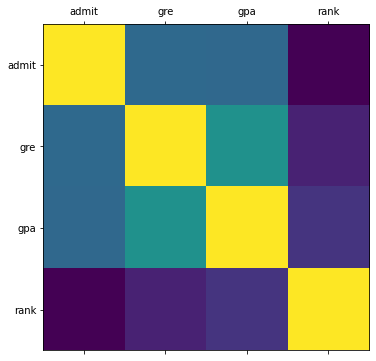

In [23]:
plot_correlation_heatmap(admission_data)

### Now we will calculate the ratio of admissions from the outcome variable

In [46]:
# Percentage of admission Granted
no_admissions_granted = len(admission_data.loc[admission_data['admit']==1])
no_admissions_rejected = len(admission_data.loc[admission_data['admit']==0])        

print('True Positive:',no_admissions_granted,':',(no_admissions_granted/
            (no_admissions_granted+no_admissions_rejected)*100),'%')

print('True Negative:',no_admissions_rejected,':',(no_admissions_rejected/
                        (no_admissions_rejected+no_admissions_granted))*100,'%')

True Positive: 127 : 31.75 %
True Negative: 273 : 68.25 %


### Split the data 

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [49]:
x_train.head()

,gre,gpa,rank
39,520,2.68,3
167,720,3.77,3
383,660,4.00,1
221,680,3.99,3
351,620,3.43,3


## Logistics Regression

In [52]:
# Init logistics regression
model = LogisticRegression(solver='liblinear')

In [53]:
# fit the model
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [99]:
y_predict  = model.predict(x_test)

In [100]:
# defined classes to predict
model.classes_

array([0, 1])

In [101]:
# intercept and coefficient
print('Intercept:',model.intercept_)
print('Coefficient:',model.coef_)

Intercept: [-1.15146433]
Coefficient: [[ 0.00132002  0.30665758 -0.57093028]]


### Evaluate the model

In [102]:
# .predict_proba() , gives the matrix of probabilities output
# is equal to zero or one.

model.predict_proba(x)[1:12]

array([[0.70424823, 0.29575177],
       [0.36348971, 0.63651029],
       [0.83370782, 0.16629218],
       [0.86415877, 0.13584123],
       [0.59149256, 0.40850744],
       [0.51732938, 0.48267062],
       [0.69440881, 0.30559119],
       [0.7524788 , 0.2475212 ],
       [0.54170662, 0.45829338],
       [0.75997478, 0.24002522],
       [0.53846126, 0.46153874]])

- In the Matrix above ,each row corrsponds to a single observation.
- The First column is the probability of the predicted o/p being zero, i.e $ {1-p{(x)}} $
- The Second column is the probability that the o/p is one , or ${p{(x)}}$

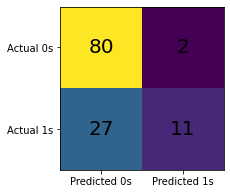

In [103]:
# drawing confusion matrix
cm = confusion_matrix(y_test,y_predict)
p=['Predicted 0s','Predicted 1s']
a=['Actual 0s','Actual 1s']
fig,ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black',fontsize=20)
plt.show()

In [96]:
# score
model.score(x,y)

0.715

In [105]:
# classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        82
           1       0.85      0.29      0.43        38

    accuracy                           0.76       120
   macro avg       0.80      0.63      0.64       120
weighted avg       0.78      0.76      0.72       120



In [ ]:
# There is still chances for imporovement of our model
